## Create a Cryptocurrency Trading Algorithm in Python

##### What you will Learn¶

After completing this guided project you will be able to:

> Fetch Cryptocurrency market prices and data

> Perform basic analysis of market behaviour

> Implement a simple algorithmic trading strategy

> Analyze the performance of the trading algorithm

##### Let's get started

First, we'll need a way to retrieve the cryptocurrency market data we need. Yahoo Finance is a popular website and service that provides up-to-date financial news and market quotes. Luckily, there is a Python library called yfinance that allows you to easily access and save this data. Let's go ahead and install it.

In [1]:
!pip install yfinance 

We'll also use a few other Python libraries to do some basic analysis of the cryptocurrency market data. Let's go ahead and install those too. If you are running this notebook in SKills Network Labs, pandas, numpy, and matplotlib are already installed so the following lines have been commented out. If you are running this notebook elsewhere, you can uncomment the pip install lines and run the cells.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

Now lets import the libraries we are going to use 


In [3]:
import yfinance as yf 
from matplotlib.dates import DateFormatter  


#### Get Familiar with Bitcoin-USD Exchange Rate Data
The yfinance library has a built-in method for retrieving historical market data. Let's use this to get the exchange rate of Bitcoin to US Dollars over the year of 2020. We use the download() method, passing in the ticker we're interested in ("BTC-USD"), the start and end dates, and the time interval between datapoints. Let's use a 1 day interval.

In [4]:
#Retrieve two weeks of BitCoin to USD exchange rates with a 1 hour inerval and save the DataFrame to a variable 
BTC_USD = yf.download("BTC-USD", start="2020-01-01", end ="2020-12-31", interval = "1d")

[*********************100%***********************]  1 of 1 completed


Now we have a dataframe assigned to the variable BTC_USD storing the historical BTC-USD exchange over 2020. To get a sense for the data we have, try calling the head() method from the pandas library on the dataframe.

In [5]:
#calling head()method on the BTC_USD variable 
BTC_USD.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275


As you can see, the dataframe has 7 columns. The first column gives the date, the second column gives the opening price of Bitcoin in USD for the day, followed by the day's price high and low, then the day's closing and adjusted closing prices, and finally, the trading volume.

## Create a Price Chart 

A great way to get a feel for the data you're working with is to create a basic plot to visualize it. Price charts are an essential tool for understanding and analyzing a given stock or currency. They are a time series showing an asset's price over time. The most basic type of price chart is the line chart, so let's go ahead and make one of those.

In a line chart, we connect the adjusted closing price of the asset at the end of each day with a continuous line. We can use the matploitlib library to easily create our price chart. Let's do it!

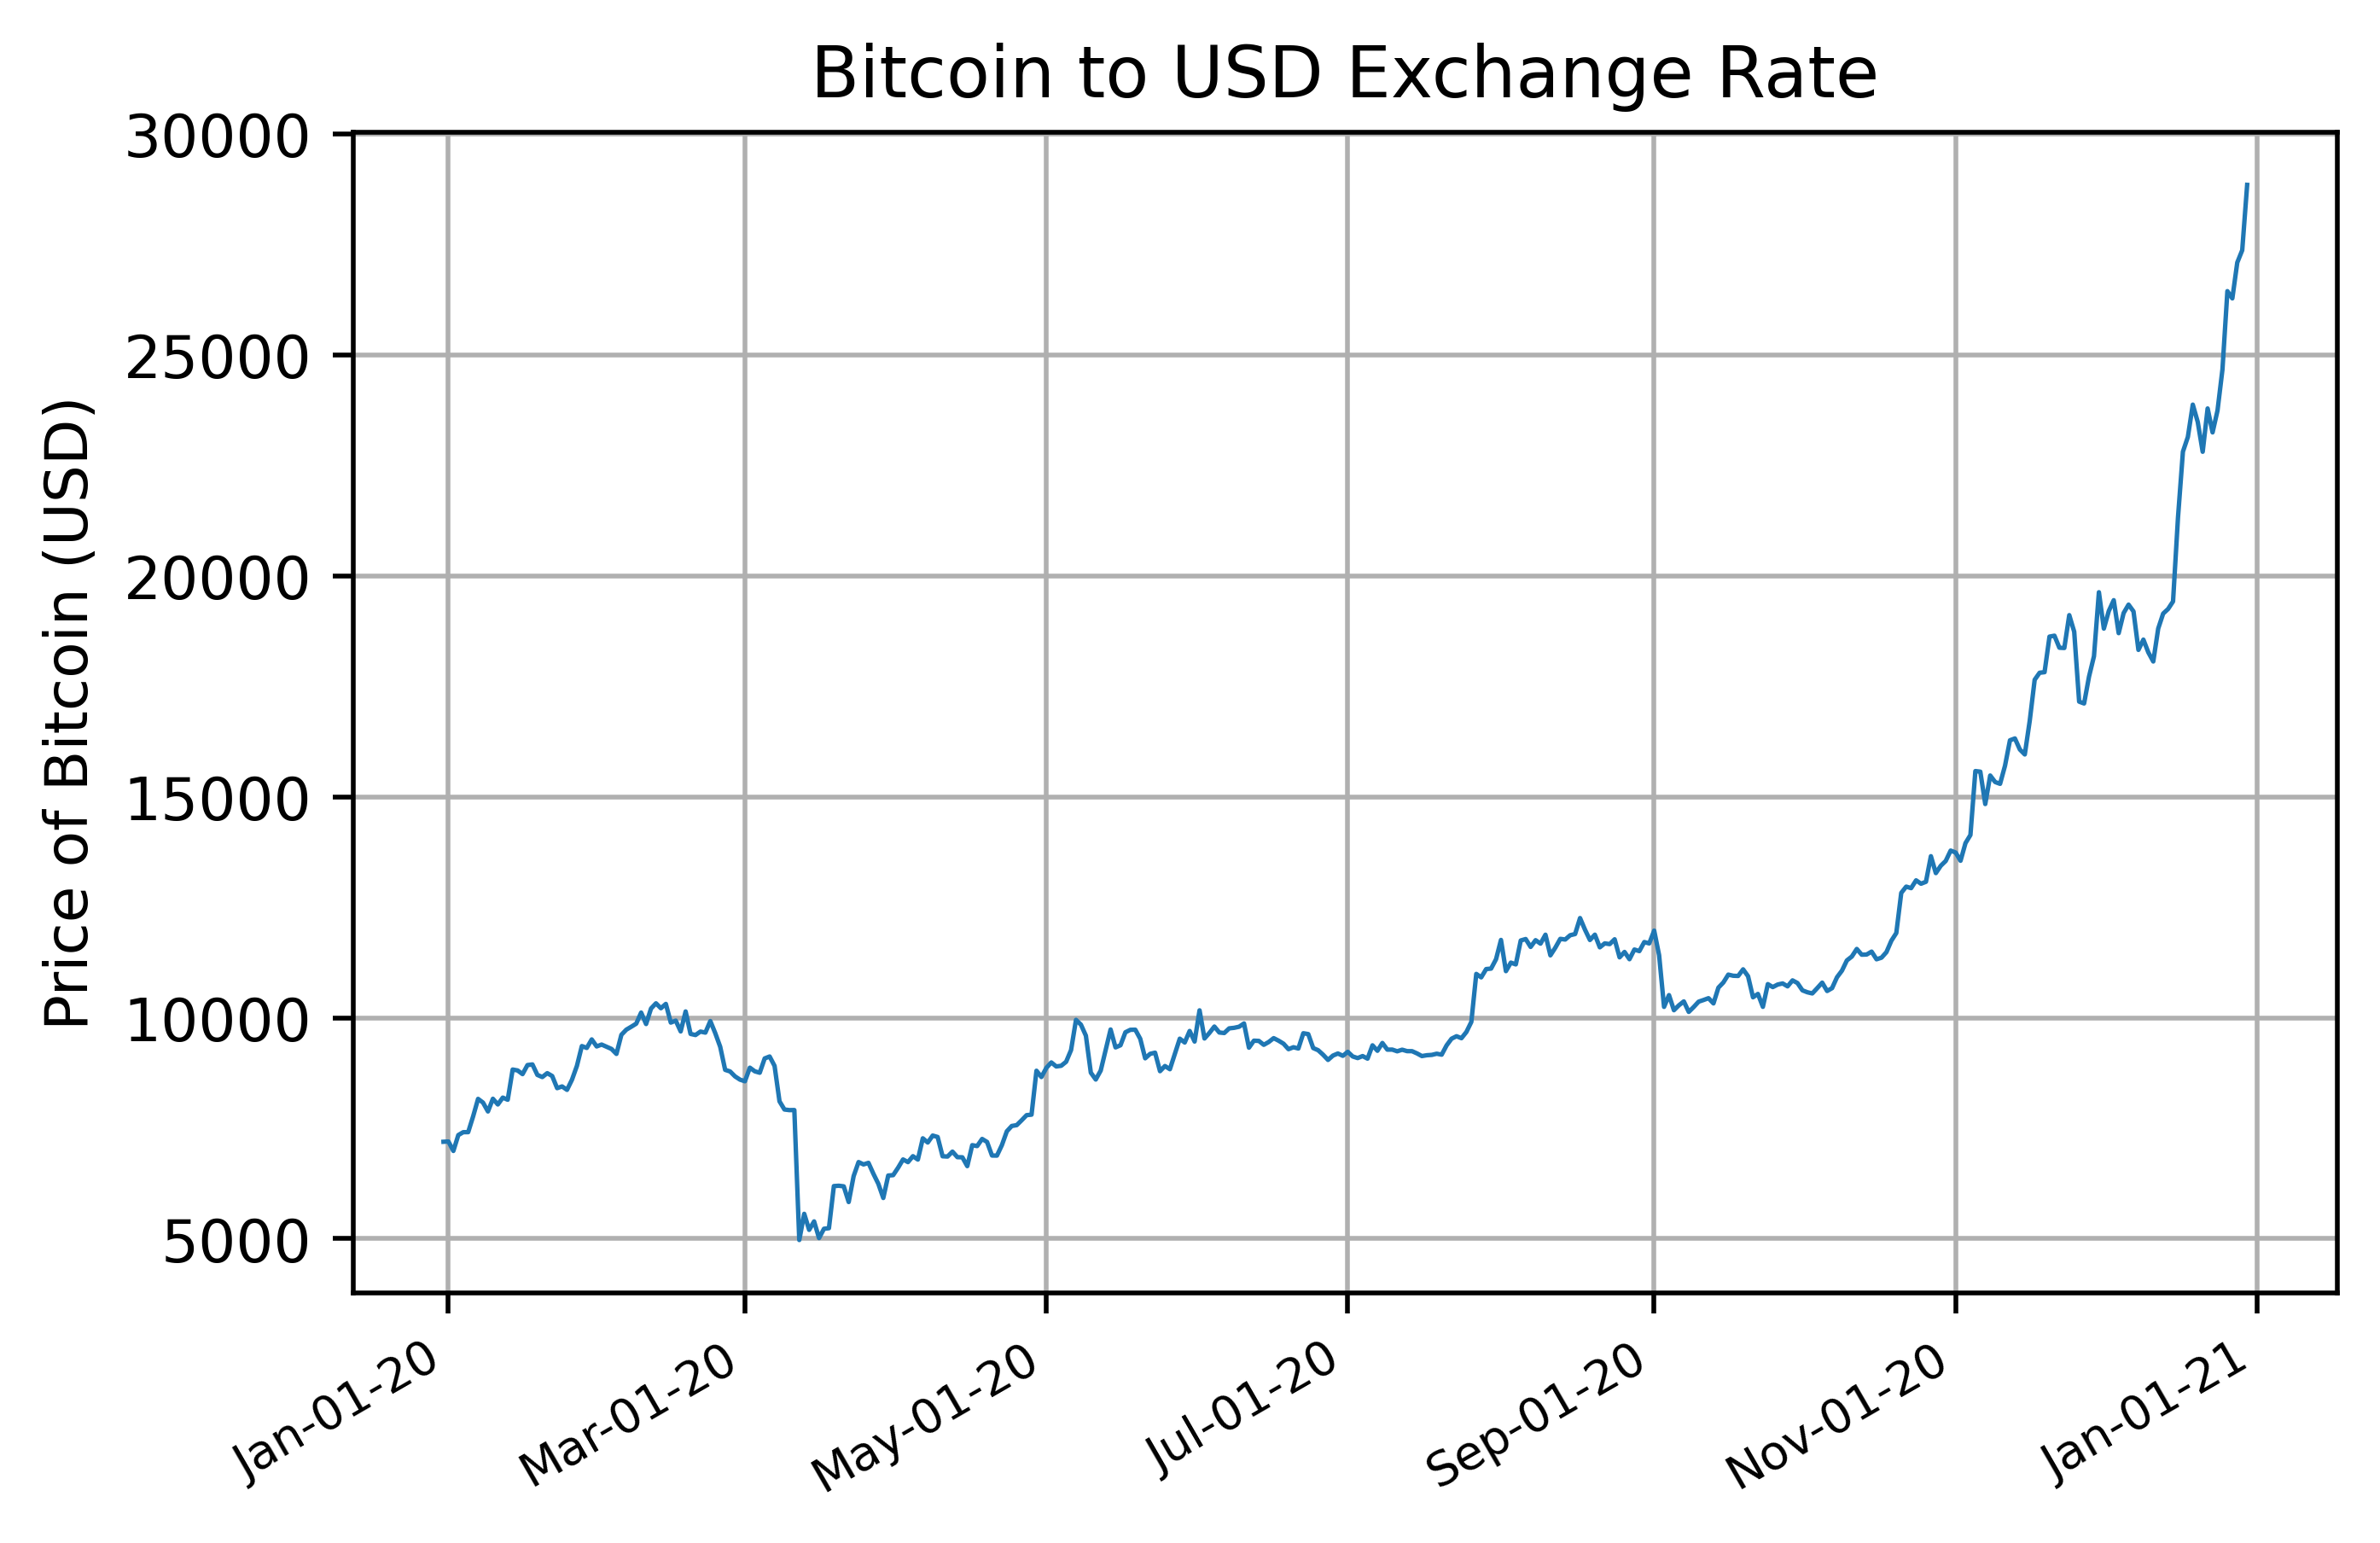

In [6]:
fig, ax=plt.subplots(dpi=500)

#formatting the date axis
date_format=DateFormatter('%h-%d-%y')
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x',labelsize=8)
fig.autofmt_xdate()

#plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'],lw=0.75)

#Adding labes and titles to the plot 
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() #adding a grid 

#Displaying the price chart 
plt.show()

In [7]:
#Compute a 9-day Simple Moving Average with pandas
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()


In the code above, you added a new column to the BTC_USD dataframe called SMA_9 that contains the datapoints for a 9-day Simple Moving Average.

In [8]:
# Add your code below and run the cell
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()

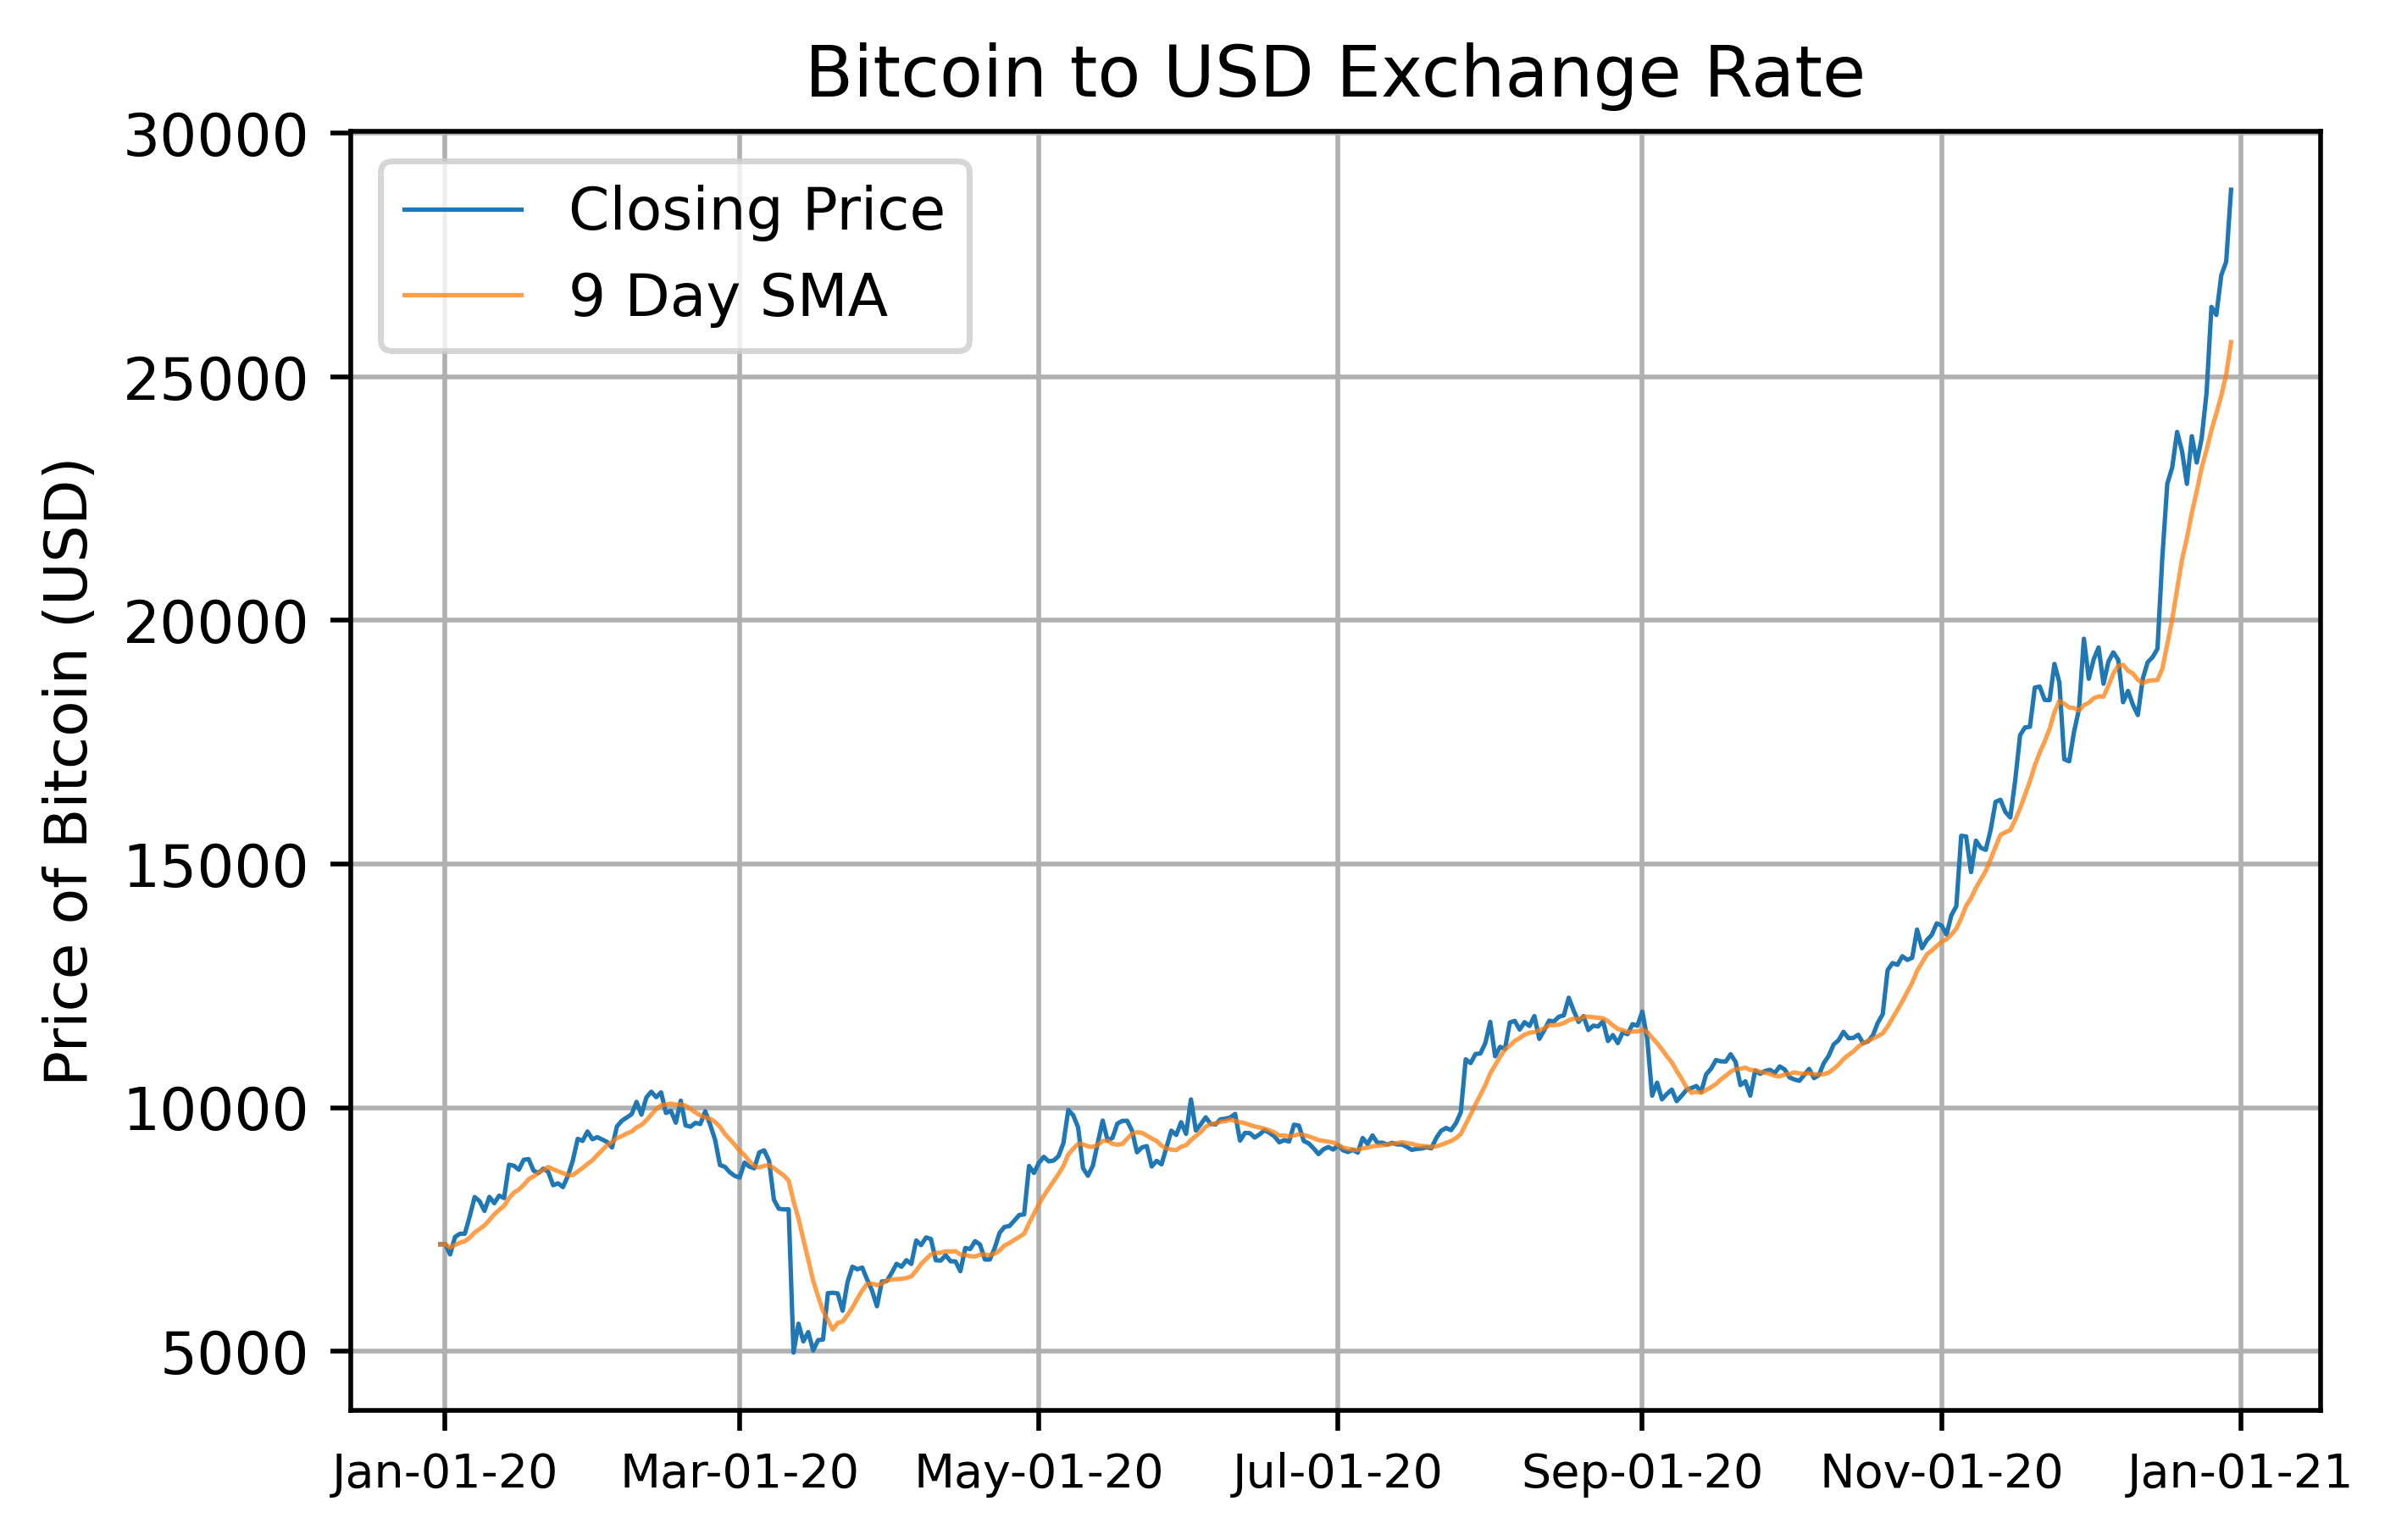

In [9]:
ig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

"""
You have already seen the code above earlier - we are simply reusing it.
Below we plot the 9 and 30 day Simple Moving Averages and give them the appropriate label
"""
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
#ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()